<a href="https://colab.research.google.com/github/deyaaa13/DataMining/blob/main/JURNAL_PDT_kmeans_fastfood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Library

In [ ]:
import numpy as np
import pandas as pd

### Preprocessing dasar

In [ ]:
pd.set_option("display.max_column",None)
df = pd.read_csv("fastfood.csv")
df.head(3)

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other


In [ ]:
df.shape

(515, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        503 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      514 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        305 non-null    float64
 15  calcium      305 non-null    float64
 16  salad        515 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory usage: 68.5+ KB


In [ ]:
null_vals = dict(df.isnull().sum())
null_vals

{'restaurant': 0,
 'item': 0,
 'calories': 0,
 'cal_fat': 0,
 'total_fat': 0,
 'sat_fat': 0,
 'trans_fat': 0,
 'cholesterol': 0,
 'sodium': 0,
 'total_carb': 0,
 'fiber': 12,
 'sugar': 0,
 'protein': 1,
 'vit_a': 214,
 'vit_c': 210,
 'calcium': 210,
 'salad': 0}

In [ ]:
for key,val in null_vals.items():
    print(f"null values for {key} =======> {(int(val)/df.shape[0])*100}")

null values for restaurant =======> 0.0
null values for item =======> 0.0
null values for calories =======> 0.0
null values for cal_fat =======> 0.0
null values for total_fat =======> 0.0
null values for sat_fat =======> 0.0
null values for trans_fat =======> 0.0
null values for cholesterol =======> 0.0
null values for sodium =======> 0.0
null values for total_carb =======> 0.0
null values for fiber =======> 2.3300970873786406
null values for sugar =======> 0.0
null values for protein =======> 0.1941747572815534
null values for vit_a =======> 41.55339805825243
null values for vit_c =======> 40.77669902912621
null values for calcium =======> 40.77669902912621
null values for salad =======> 0.0


In [ ]:
null_cols = ['fiber','protein','vit_a','vit_c','calcium']
null_cols_avg = {}
for col in null_cols:
    null_cols_avg[col] = df[col].describe().mean()
null_cols_avg

{'fiber': 67.14682965168379,
 'protein': 102.8843714070368,
 'vit_a': 70.6551841488183,
 'vit_c': 99.97034180718309,
 'calcium': 87.92181644364442}

In [ ]:
df.fillna(value=null_cols_avg,inplace=True)
df.isnull().sum()

restaurant     0
item           0
calories       0
cal_fat        0
total_fat      0
sat_fat        0
trans_fat      0
cholesterol    0
sodium         0
total_carb     0
fiber          0
sugar          0
protein        0
vit_a          0
vit_c          0
calcium        0
salad          0
dtype: int64

In [ ]:
df.drop(['salad','cal_fat','sat_fat','trans_fat'],axis=1,inplace=True)

## Menentukan Labels

In [ ]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
df_seg = df.drop(['restaurant','item'],axis='columns')
df_seg.sample(3)

,calories,total_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
70,490,19,80,1130,55,5.0,12,28.0,35.000000,8.000000,15.000000
164,680,31,80,2420,62,4.0,5,37.0,6.000000,20.000000,35.000000
175,1030,51,155,2940,83,5.0,19,62.0,70.655184,99.970342,87.921816


### ----> Mencari jumlah cluster yang paling terbaik
### ---- > Menggunakan metode elbow dengan library yellowbrick

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

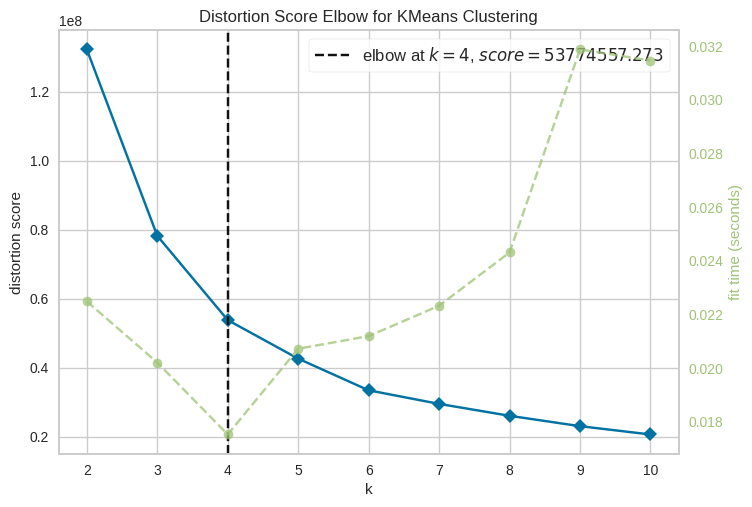

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, K=(1,10))
visualizer.fit(df_seg)
visualizer.show()

In [ ]:
inertias = []
for i in range(1,10):
    model = KMeans(n_clusters=i,init="k-means++",random_state=42)
    model.fit(df_seg)
    inertias.append(model.inertia_)
print(inertias)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[290868806.76346713, 132193797.64424579, 78198573.19120206, 53774068.03445704, 42600515.18340419, 33421568.18818365, 29336001.229746997, 26188869.210913755, 23121253.103140853]


### ---- > Metode Elbow

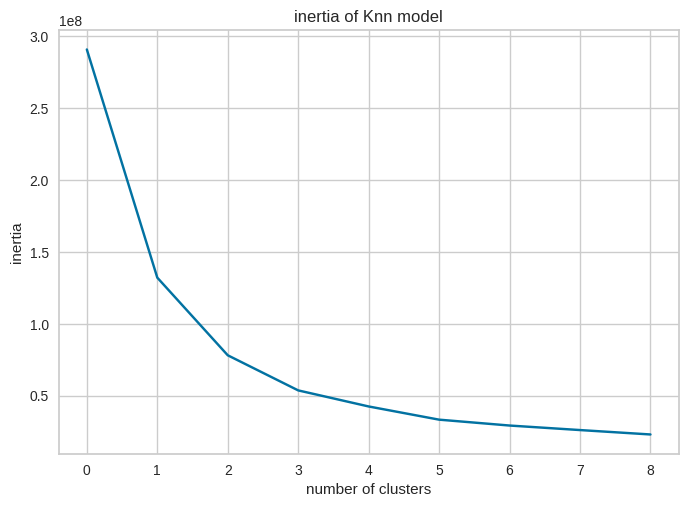

In [ ]:
plt.plot(inertias)
plt.title("inertia of Knn model")
plt.xlabel("number of clusters")
plt.ylabel("inertia")
plt.show()

>Di tetumaknnya jumlah terbaik untuk dataset ini adalah 4 cluster

### Membuat modelling dengan 4 cluster

In [ ]:
model = KMeans(n_clusters=4,init='k-means++',random_state=42)
model.fit(df_seg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [ ]:
cluster_centers = model.cluster_centers_
cluster_centers

array([[3.03939394e+02, 1.43838384e+01, 3.88383838e+01, 6.70909091e+02,
        2.78939394e+01, 3.36437793e+00, 4.13636364e+00, 1.61666667e+01,
        4.29526351e+01, 5.53148018e+01, 4.78331489e+01],
       [8.11122449e+02, 4.21530612e+01, 1.22244898e+02, 1.97316327e+03,
        6.71734694e+01, 1.04507616e+01, 1.13877551e+01, 4.36416773e+01,
        4.03585558e+01, 6.16391400e+01, 6.40959547e+01],
       [5.57711443e+02, 2.78109453e+01, 7.09203980e+01, 1.25681592e+03,
        4.89950249e+01, 5.35542532e+00, 7.73631841e+00, 2.81542289e+01,
        3.93822311e+01, 4.68850461e+01, 4.72808406e+01],
       [1.20277778e+03, 6.25000000e+01, 1.88333333e+02, 3.51333333e+03,
        8.68333333e+01, 6.66666667e+00, 1.38888889e+01, 7.23333333e+01,
        2.33678187e+01, 4.04950570e+01, 4.37647472e+01]])

In [ ]:
labels = model.labels_
labels[:10]

array([2, 1, 1, 1, 1, 2, 0, 2, 2, 2], dtype=int32)

In [ ]:
df['labels'] = labels
df.sample(3)

,restaurant,item,calories,total_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,labels
227,Burger King,Chicken Caesar Salad w/ Crispy Chicken,670,43,80,1760,40,5.0,8,34.0,70.655184,99.970342,87.921816,1
299,Dairy Queen,Grilled Chicken Garden Greens Salad,150,2,40,730,10,3.0,6,23.0,70.655184,99.970342,87.921816,0
481,Taco Bell,Beefy Cheddar Crunchwrap Slider,410,19,25,960,46,4.0,3,14.0,70.655184,99.970342,87.921816,0


#### Done first part 😌

## Pemisahan data menjadi "makanan yang sehat" dan "makanan yang tidak sehat"

In [ ]:
import seaborn as sn

In [ ]:
label_0 = df[df['labels']==0]
label_1 = df[df['labels']==1]
label_2 = df[df['labels']==2]
label_3 = df[df['labels']==3]
print("label 0",len(label_0))
print("label 1",len(label_1))
print("label 2",len(label_2))
print("label 3",len(label_3))

label 0 198
label 1 98
label 2 201
label 3 18


### ----> Mengumpulkan rata-rata dari nutrisi yang terkandung

In [ ]:
nutritions = list(label_0.describe().columns)
label_0_nutri_avg = label_0.describe().mean().values
label_1_nutri_avg = label_1.describe().mean().values
label_2_nutri_avg = label_2.describe().mean().values
label_3_nutri_avg = label_3.describe().mean().values

print("label_0_nutri_avg",label_0_nutri_avg)
print("label_1_nutri_avg",label_1_nutri_avg)
print("label_2_nutri_avg",label_2_nutri_avg)
print("label_3_nutri_avg",label_3_nutri_avg)

label_0_nutri_avg [284.56585313  38.82217361  65.06166896 519.32941155  51.38060319
  35.07344277  29.42060259  38.32580546  73.26778613  81.79601288
  64.62109648  24.75      ]
label_1_nutri_avg [ 646.35283328   51.63469021  181.21494705 1545.57741549   66.69882916
   26.19006499   25.13430569   53.71263679   44.28259088   97.96417381
   87.42972418   13.        ]
label_2_nutri_avg [472.02917858  49.07670752  88.87289844 993.66793659  65.64652803
  36.82189246  34.07306585  48.91445255  69.67027789  65.96102437
  63.64299593  26.625     ]
label_3_nutri_avg [1011.37568291   55.95993375  173.92182166 2885.42513991   72.81028462
    7.87188299   20.97542441   67.80956216   22.40157091   37.87450995
   39.65991935    4.5       ]


### ----> Visualisasi dengan penamaan label pada tiap cluster
* label 0
* label 1
* label 2
* label 3

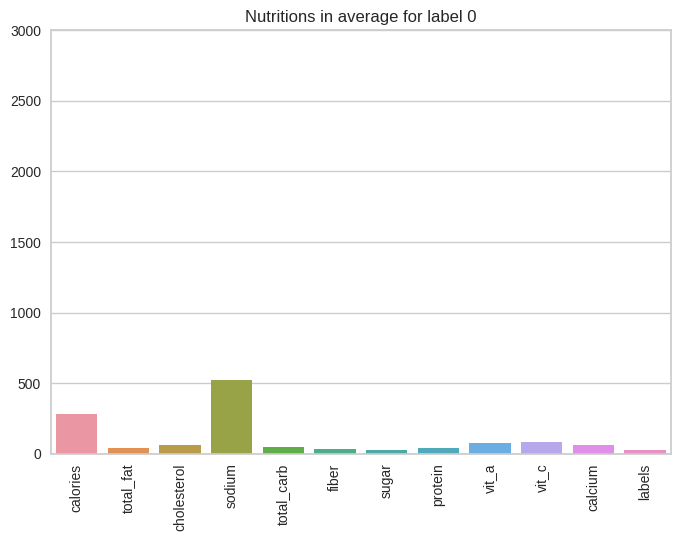

In [ ]:
# label 0
sn.barplot(x=nutritions,y=label_0_nutri_avg)
plt.title("Jumlah nutrisi yang terkandung pada label 0")
plt.xticks(rotation=90)
plt.ylim([0,3000])
plt.show()

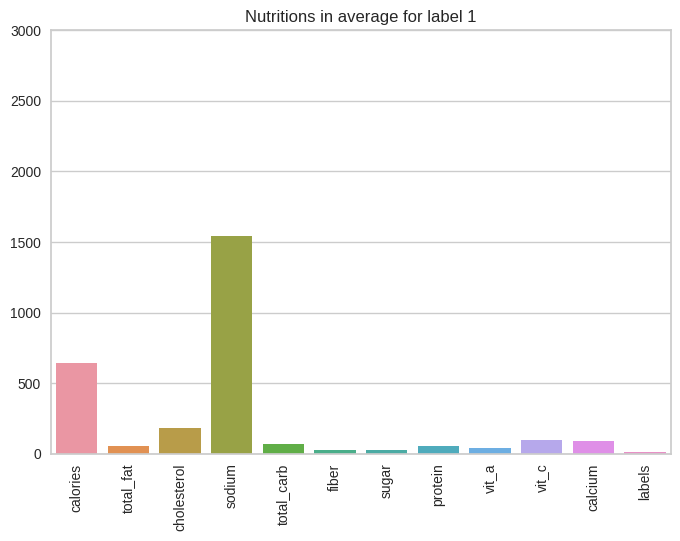

In [ ]:
# label 1
sn.barplot(x=nutritions,y=label_1_nutri_avg)
plt.title("Jumlah nutrisi yang terkandung pada label 1")
plt.xticks(rotation=90)
plt.ylim([0,3000])
plt.show()

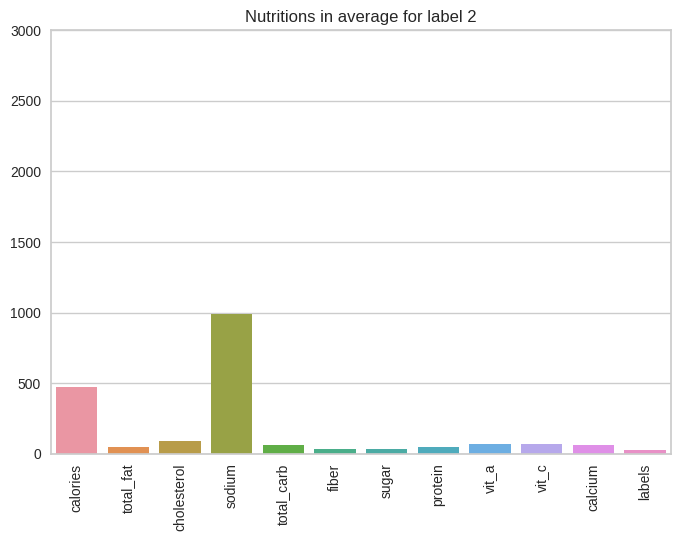

In [ ]:
# label 2
sn.barplot(x=nutritions,y=label_2_nutri_avg)
plt.title("Jumlah nutrisi yang terkandung pada label 2")
plt.xticks(rotation=90)
plt.ylim([0,3000])
plt.show()

### ----> Membuat clustering baru menjadi 2 yaitu yang berupa nutrisi baik dan nutrisi buruk

In [ ]:
positive_ntr = ['protein','calcium','total_carb','vit_a','vit_c','fiber']
negative_ntr = ['sugar','calories','total_fat','sodium','cholesterol']

### ----> Mengumpulkan rata-rata untuk nutrisi yang terkandung dalam makanan

In [ ]:
def zipper(lis1,lis2):
    temp = {}
    for v1,v2 in zip(lis1,lis2):
        temp[v1] = v2
    return temp

label_0_dic = zipper(nutritions,label_0_nutri_avg)
label_1_dic = zipper(nutritions,label_1_nutri_avg)
label_2_dic = zipper(nutritions,label_2_nutri_avg)
label_3_dic = zipper(nutritions,label_3_nutri_avg)

print("label_0_zipped",label_0_dic)
print("\n\nlabel_1_zipped",label_1_dic)
print("\n\nlabel_2_zipped",label_2_dic)
print("\n\nlabel_3_zipped",label_3_dic)

label_0_zipped {'calories': 284.565853125518, 'total_fat': 38.8221736070514, 'cholesterol': 65.06166896101948, 'sodium': 519.3294115532656, 'total_carb': 51.3806031862152, 'fiber': 35.07344277032587, 'sugar': 29.420602585977285, 'protein': 38.32580545912687, 'vit_a': 73.26778613317569, 'vit_c': 81.79601287982078, 'calcium': 64.62109647845732, 'labels': 24.75}


label_1_zipped {'calories': 646.3528332826143, 'total_fat': 51.6346902054411, 'cholesterol': 181.2149470460958, 'sodium': 1545.5774154854275, 'total_carb': 66.69882916384057, 'fiber': 26.190064985926586, 'sugar': 25.13430568804795, 'protein': 53.712636790339644, 'vit_a': 44.282590875757165, 'vit_c': 97.96417380567384, 'calcium': 87.42972417857777, 'labels': 13.0}


label_2_zipped {'calories': 472.02917858344045, 'total_fat': 49.076707524835186, 'cholesterol': 88.87289844483453, 'sodium': 993.6679365853396, 'total_carb': 65.64652802890258, 'fiber': 36.8218924615535, 'sugar': 34.07306584697652, 'protein': 48.91445254658747, 'vit_a

In [ ]:
pn_avg_label_0 = {}
pn_avg_label_1 = {}
pn_avg_label_2 = {}
pn_avg_label_3 = {}
for i in range(3):
    lis1 = []
    lis2 = []
    lis3 = []
    lis4 = []
    for pos_val in positive_ntr:
        lis1.append(label_0_dic[pos_val])
        lis2.append(label_1_dic[pos_val])
        lis3.append(label_2_dic[pos_val])
        lis4.append(label_3_dic[pos_val])
    pn_avg_label_0['pos'] = sum(lis1)/len(lis1)
    pn_avg_label_1['pos'] = sum(lis2)/len(lis2)
    pn_avg_label_2['pos'] = sum(lis3)/len(lis3)
    pn_avg_label_3['pos'] = sum(lis4)/len(lis4)


for i in range(3):
    lis1 = []
    lis2 = []
    lis3 = []
    lis4 = []
    for pos_val in negative_ntr:
        lis1.append(label_0_dic[pos_val])
        lis2.append(label_1_dic[pos_val])
        lis3.append(label_2_dic[pos_val])
        lis4.append(label_3_dic[pos_val])
    pn_avg_label_0['neg'] = sum(lis1)/len(lis1)
    pn_avg_label_1['neg'] = sum(lis2)/len(lis2)
    pn_avg_label_2['neg'] = sum(lis3)/len(lis3)
    pn_avg_label_3['neg'] = sum(lis4)/len(lis4)

In [ ]:
pos = [pn_avg_label_0['pos'],pn_avg_label_1['pos'],pn_avg_label_2['pos'],pn_avg_label_3['pos']]
neg = [pn_avg_label_0['neg'],pn_avg_label_1['neg'],pn_avg_label_2['neg'],pn_avg_label_3['neg']]

In [ ]:
labels = ["label_0","label_1","label_2","label_3"]

### ----> Memvisualisasikan data makanan yang mengandung nutrisi baik untuk setiap label yang dibuat sebelumnya

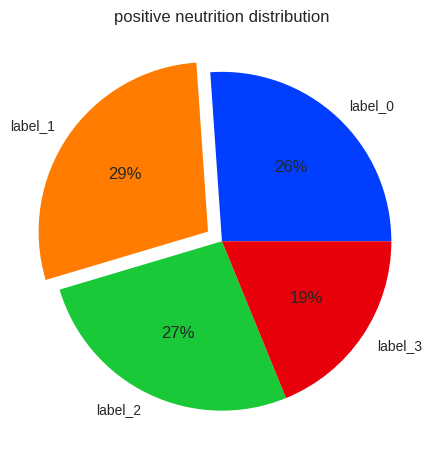

In [ ]:
data = pos

palette_color = sn.color_palette('bright')
explode = [0,0.1,0,0]
plt.pie(data, explode = explode, labels=labels, colors=palette_color, autopct='%.0f%%')
plt.title("positive neutrition distribution")
plt.show()

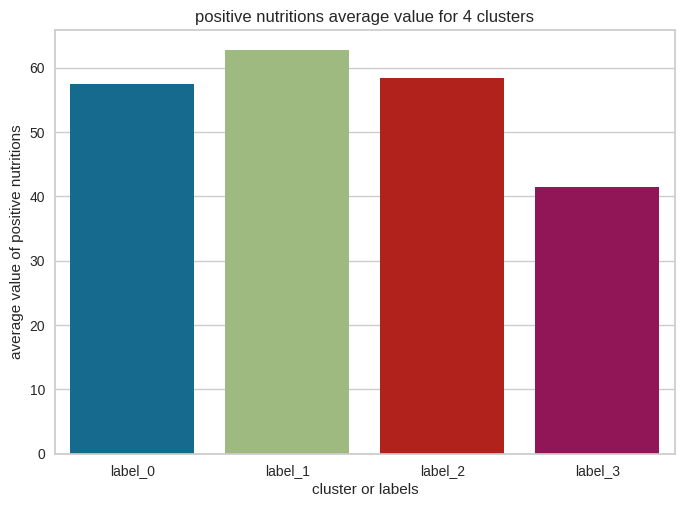

In [ ]:
sn.barplot(x=labels,y=pos)
plt.title("positive nutritions average value for 4 clusters")
plt.xlabel("cluster or labels")
plt.ylabel("average value of positive nutritions")
plt.show()

### ----> Memvisualisasikan data makanan yang mengandung nutrisi buruk untuk setiap label yang dibuat sebelumnya

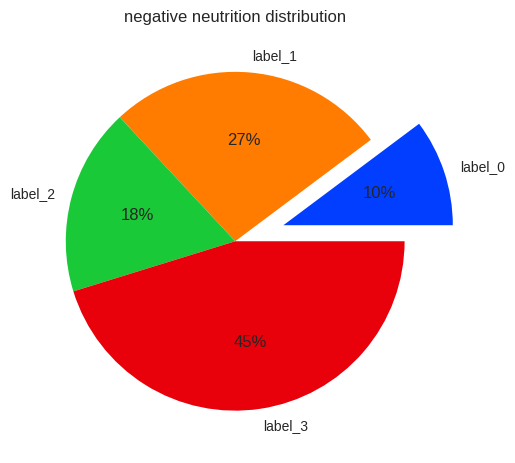

In [ ]:
data = neg

palette_color = sn.color_palette('bright')
explode = [0.3,0,0,0]
plt.pie(data, explode=explode, labels=labels, colors=palette_color, autopct='%.0f%%')
plt.title("negative neutrition distribution")
plt.show()

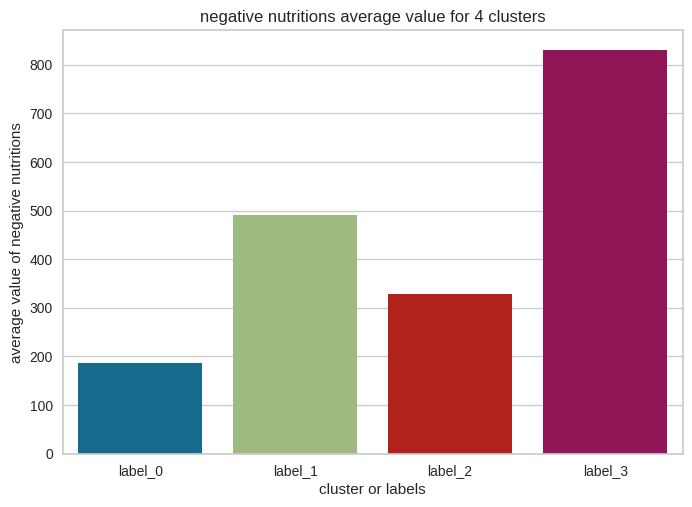

In [ ]:
sn.barplot(x = labels,y=neg)
plt.title("negative nutritions average value for 4 clusters")
plt.xlabel("cluster or labels")
plt.ylabel("average value of negative nutritions")
plt.show()

## Membagi makanan mana saja yang boleh dimakan secara sehat

In [ ]:
# label_name = (positive,negative)
label_0_pn = (26,10)
label_1_pn = (29,27)
label_2_pn = (27,18)
label_3_pn = (19,45)
labels_pos_neg = [label_0_pn,label_1_pn,label_2_pn,label_3_pn]

In [ ]:
healthy_level = [pos-neg for pos,neg in labels_pos_neg]
healthy_level

[16, 2, 9, -26]

## Makanan sehat dari fastfood

In [ ]:
label_0['item'].unique()

array(['Cheeseburger', 'Filet-O-Fish®', 'Garlic White Cheddar Burger',
       'Hamburger', 'Lobster Roll', 'McChicken', 'McDouble', 'McRib',
       '3 piece Buttermilk Crispy Chicken Tenders',
       '4 Piece Chicken McNuggets', '6 Piece Chicken McNuggets',
       '10 Piece Chicken McNuggets', 'Premium Asian Salad w/o Chicken',
       'Premium Asian Salad w/ Grilled Chicken',
       'Premium Bacon Ranch Salad w/o Chicken',
       'Premium Southwest Salad w/o Chicken',
       'Chargrilled Chicken Sandwich', 'Chick-n-Slider',
       '1 Piece Chick-n-Strips', '2 Piece Chick-n-Strips',
       '3 Piece Chick-n-Strips', '4 piece Chicken Nuggets',
       '6 piece Chicken Nuggets', '8 piece Chicken Nuggets',
       '4 Piece Grilled Chicken Nuggets',
       '6 Piece Grilled Chicken Nuggets',
       '8 piece Grilled Chicken Nuggets',
       '12 Piece Grilled Chicken Nuggets',
       'Chargrilled Chicken Cool Wrap', 'Jr. Burger',
       'Jr. Chili Cheeseburger', 'Jr. Deluxe Burger',
       'Jr. D

## Makanan tidak sehat dari fastfood

In [ ]:
label_3['item'].unique()

array(['10 piece Buttermilk Crispy Chicken Tenders',
       '12 piece Buttermilk Crispy Chicken Tenders',
       '20 piece Buttermilk Crispy Chicken Tenders',
       '40 piece Chicken McNuggets',
       "10 piece Sweet N' Spicy Honey BBQ Glazed Tenders",
       '30 piece Chicken Nuggets',
       'Buffalo Dunked Ultimate Chicken Sandwich',
       'Half Pound French Dip & Swiss', 'Triple Decker Sandwich',
       '4 Piece Chicken Strip Basket w/ Country Gravy',
       '6 Piece Chicken Strip Basket w/ Country Gravy',
       'Footlong Big Hot Pastrami',
       'Footlong Carved Turkey & Bacon w/ Cheese',
       'Footlong Corned Beef Reuben', 'Footlong Italian Hero',
       'Footlong Spicy Italian',
       'Footlong Turkey Italiano Melt (with Provolone)',
       'Turkey, Bacon & Guacamole Wrap'], dtype=object)

## Makanan sedang dari fastfood

In [ ]:
label_1['item'].unique()

array(['Single Bacon Smokehouse Burger', 'Double Bacon Smokehouse Burger',
       'Grilled Bacon Smokehouse Chicken Sandwich',
       'Crispy Bacon Smokehouse Chicken Sandwich',
       'Grilled Maple Bacon Dijon Chicken Sandwich',
       'Crispy Maple Bacon Dijon Chicken Sandwich',
       'Grilled Sweet BBQ Bacon Chicken Sandwich',
       'Crispy Sweet BBQ Bacon Chicken Sandwich',
       '6 piece Buttermilk Crispy Chicken Tenders',
       '20 Piece Chicken McNuggets',
       "4 piece Sweet N' Spicy Honey BBQ Glazed Tenders",
       "6 piece Sweet N' Spicy Honey BBQ Glazed Tenders", 'Spicy Deluxe',
       'Chicken Enchiladas Meal Kit', 'Chicken Parmesan Meal Kit',
       'Super Sonic Bacon Double Cheeseburger (w/mayo)',
       'Super Sonic Double Cheeseburger W/ Mustard',
       'Super Sonic Double Cheeseburger W/ Ketchup',
       'Super Sonic Double Cheeseburger W/ Mayo',
       'Super Sonic Jalapeno Double Cheeseburger',
       'Garlic Parmesan Dunked Ultimate Chicken Sandwich',
     

In [ ]:
label_2['item'].unique()

array(['Artisan Grilled Chicken Sandwich', 'Big Mac',
       'Classic Chicken Sandwich', 'Double Cheeseburger',
       'Double Quarter Pounder® with Cheese',
       'Grilled Garlic White Cheddar Chicken Sandwich',
       'Crispy Garlic White Cheddar Chicken Sandwich',
       'Maple Bacon Dijon 1/4 lb Burger', 'Pico Guacamole 1/4 lb Burger',
       'Grilled Pico Guacamole Chicken Sandwich',
       'Crispy Pico Guacamole Chicken Sandwich',
       'Premium Buttermilk Crispy Chicken Deluxe Sandwich',
       'Premium Crispy Chicken Deluxe Sandwich',
       'Quarter Pounder® with Cheese', 'Signature Sriracha Burger',
       'Grilled Signature Sriracha Chicken Sandwich',
       'Crispy Signature Sriracha Chicken Sandwich',
       'Sweet BBQ Bacon 1/4 lb Burger',
       '4 piece Buttermilk Crispy Chicken Tenders',
       'Premium Asian Salad w/ Crispy Chicken',
       'Premium Bacon Ranch Salad w/ Grilled Chicken',
       'Premium Bacon Ranch Salad w/ Crispy Chicken',
       'Premium Southwest